<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


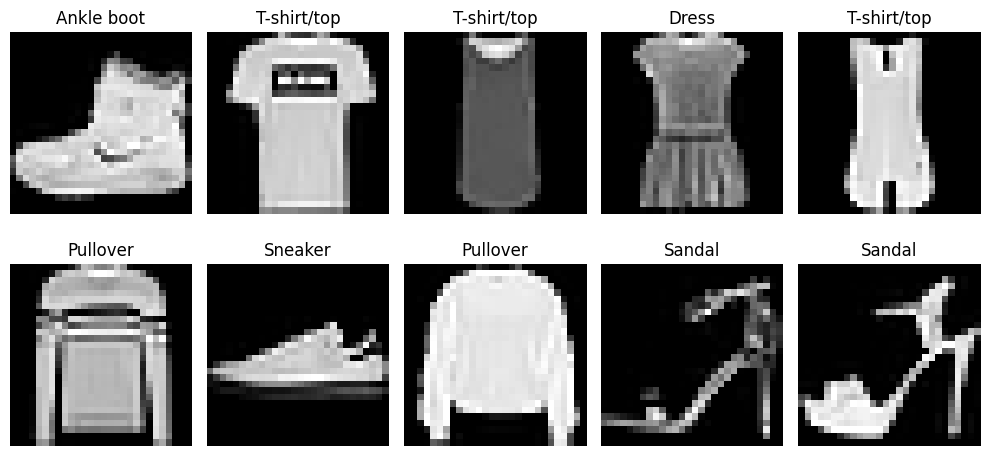

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Visualize 10 sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [4]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)


In [5]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    X_train_flat,
    y_train_cat,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    verbose=2
)


Epoch 1/15
844/844 - 11s - 13ms/step - accuracy: 0.8185 - loss: 0.5043 - val_accuracy: 0.8595 - val_loss: 0.3925
Epoch 2/15
844/844 - 14s - 16ms/step - accuracy: 0.8600 - loss: 0.3829 - val_accuracy: 0.8638 - val_loss: 0.3721
Epoch 3/15
844/844 - 11s - 13ms/step - accuracy: 0.8707 - loss: 0.3489 - val_accuracy: 0.8788 - val_loss: 0.3439
Epoch 4/15
844/844 - 9s - 11ms/step - accuracy: 0.8775 - loss: 0.3314 - val_accuracy: 0.8718 - val_loss: 0.3376
Epoch 5/15
844/844 - 9s - 11ms/step - accuracy: 0.8847 - loss: 0.3114 - val_accuracy: 0.8785 - val_loss: 0.3314
Epoch 6/15
844/844 - 10s - 12ms/step - accuracy: 0.8885 - loss: 0.2990 - val_accuracy: 0.8818 - val_loss: 0.3271
Epoch 7/15
844/844 - 8s - 10ms/step - accuracy: 0.8902 - loss: 0.2900 - val_accuracy: 0.8828 - val_loss: 0.3248
Epoch 8/15
844/844 - 11s - 13ms/step - accuracy: 0.8959 - loss: 0.2775 - val_accuracy: 0.8830 - val_loss: 0.3146
Epoch 9/15
844/844 - 10s - 12ms/step - accuracy: 0.8978 - loss: 0.2710 - val_accuracy: 0.8870 - val

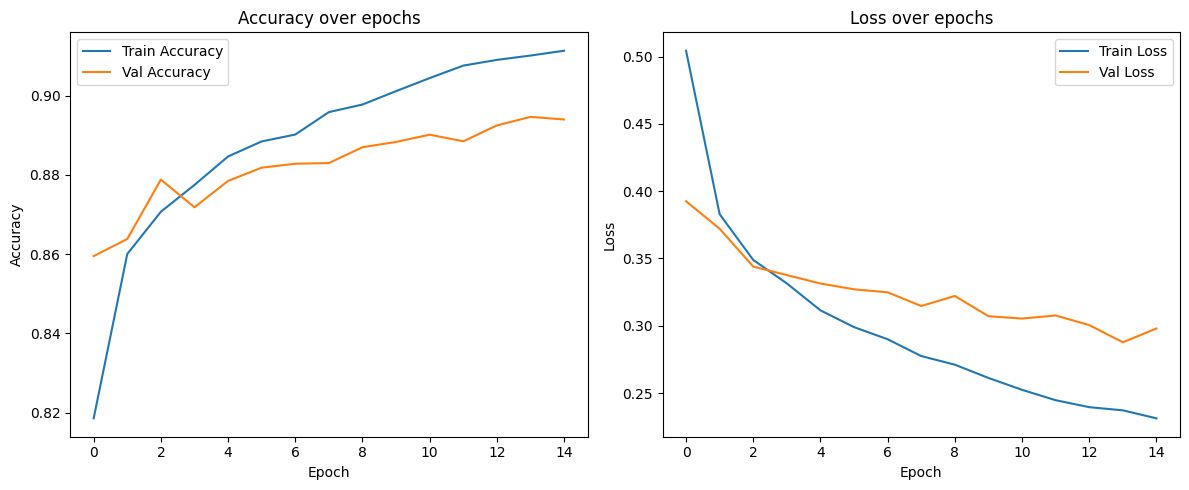

In [9]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


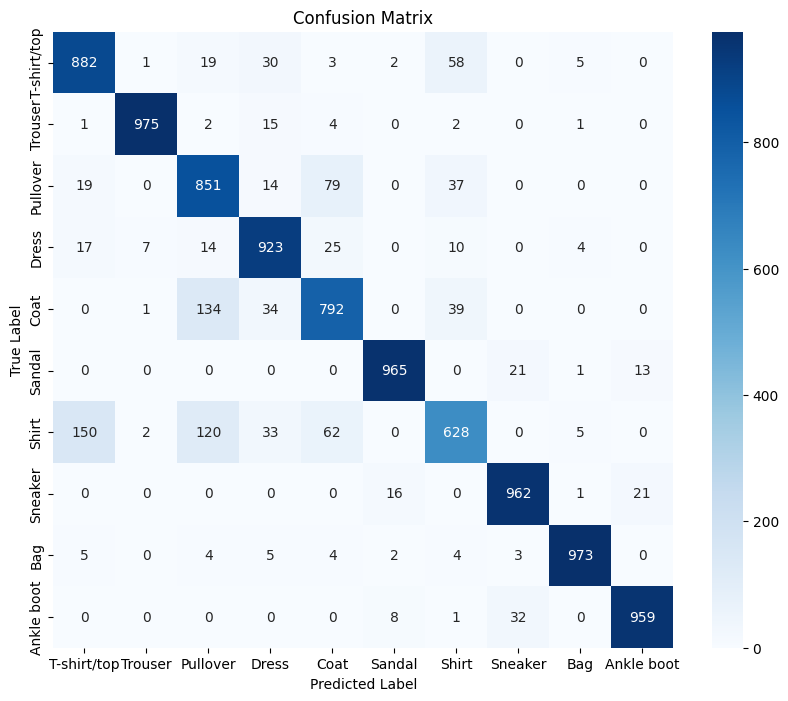

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.85      0.79      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.82      0.79      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.81      0.63      0.71      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions
y_pred_prob = model.predict(X_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=class_names))
